In [1]:
#Assignment 4

In [2]:
#1(a-c) on paper in image

In [3]:
#2) 

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [161]:
import numpy as np
from astropy import constants as cn
from astropy import units as un
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.integrate import odeint
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [155]:
#defining constants
c = (cn.c).value
G = (cn.G).value
L_sun = (cn.L_sun).value
R_sun = (cn.R_sun).value
M_sun = (cn.M_sun).value
kB = (cn.k_B).value
pi = np.pi

In [305]:
#more constants
mB = 1.3E10 * M_sun
aB = 0.4 *3.086E19
mD = 6.5E10 * M_sun
aD = 4.0 *3.086E19
mH = 1.0e9
aH = 0.5

In [306]:
#2)a)

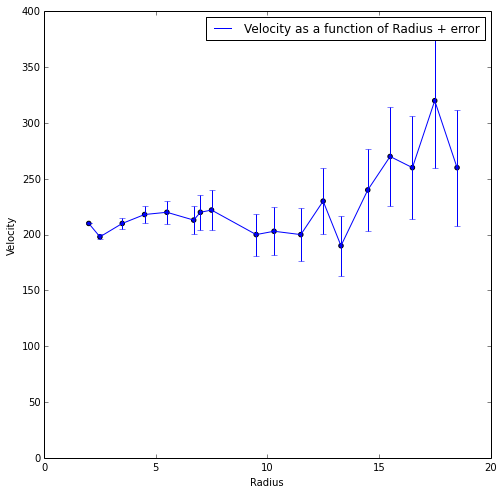

In [307]:
radiusList = [2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
velocityList = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]

yerr = np.linspace(0, 0.2, len(radiusList)) * velocityList

fig = plt.figure(1, figsize=(8,8))
plt.errorbar(radiusList, velocityList, yerr, color='blue')
#plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=ls, color='blue')

ax1 = fig.add_subplot(111)
ax1.scatter(radiusList,velocityList)
ax1.set_ylim(0, 400)
ax1.set_xlim(0,20)
ax1.set_xlabel("Radius")
ax1.set_ylabel("Velocity")

#for key:
blue_line = mlines.Line2D([], [], color='blue', label='Velocity as a function of Radius + error')
plt.legend(lines, labels)


In [308]:
#2)b)

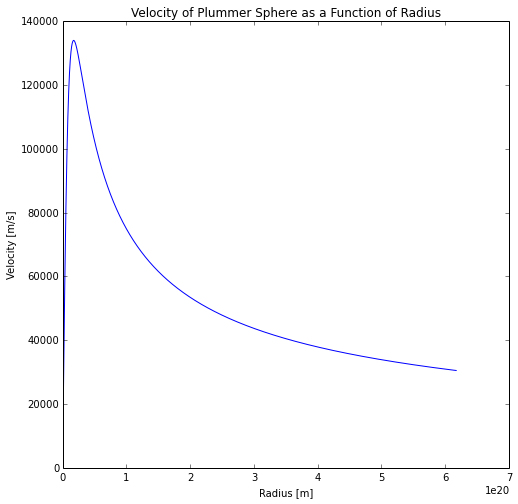

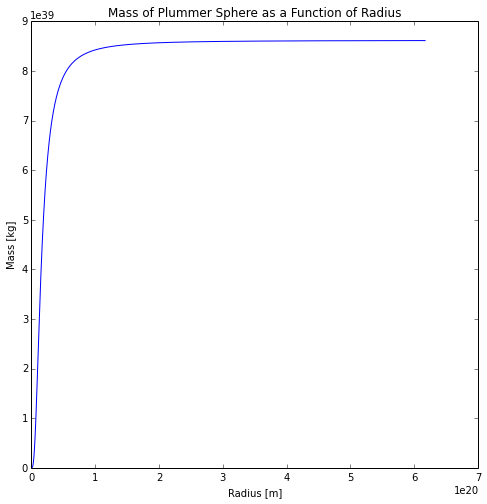

In [309]:
#for massPlummer  
rMax = 20.0 *3.086E19
r = np.linspace(0.001, rMax, 10000)
delR = rMax / 10000.0
massPlum = 0.0

def rhoPlummer(r):
    rhoPlum0 = (mB/(4.0*pi*(aB**3.0)))*((1.0 + ((r/aB)**2.0))**(-2.5))
    return rhoPlum0

def dmdrPlum(r):
    dmdrP = 4.0 * pi *(r**2.0)* rhoPlummer(r)
    return dmdrP

#for mass
mPlum = list()
for i in r:
    massPlum = massPlum + dmdrPlum(i) * delR
    mPlum.append(massPlum)

#plot mass
fig = plt.figure(3, figsize=(8,8))
mPlumGraph = fig.add_subplot(111)
mPlumGraph.plot(r, mPlum)
mPlumGraph.set_xlabel('Radius [m]')
mPlumGraph.set_ylabel('Mass [kg]')
mPlumGraph.set_title('Mass of Plummer Sphere as a Function of Radius')

#for velocity
velPlum = list()
for i, j in zip(mPlum, r):
    vPlum = (G*i/j)**0.5
    velPlum.append(vPlum)
    
#plot velocity    
#print vBulge
fig = plt.figure(2, figsize=(8,8))
vPlumGraph = plt.axes()
vPlumGraph.plot(r, velPlum)
vPlumGraph.set_title('Velocity of Plummer Sphere as a Function of Radius')
vPlumGraph.set_xlabel('Radius [m]')
vPlumGraph.set_ylabel('Velocity [m/s]')

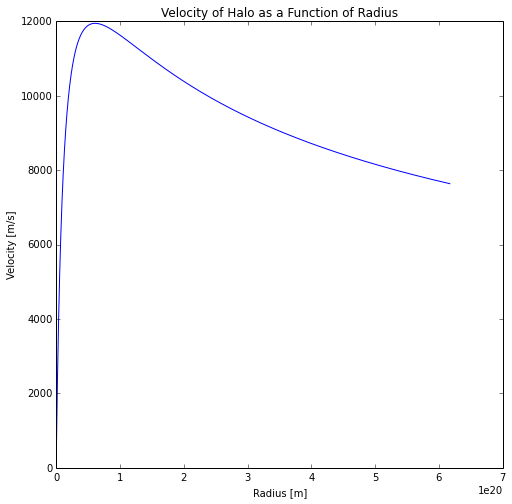

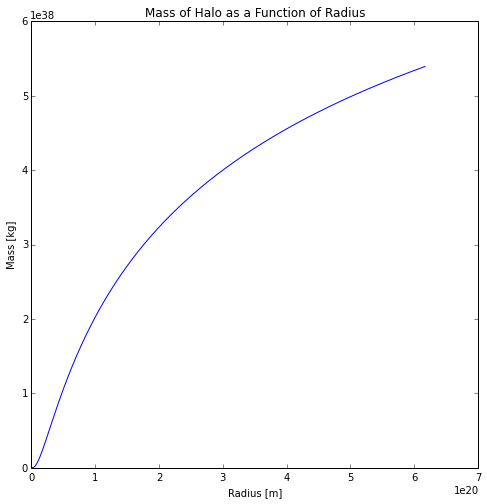

In [310]:
#for massHalo & velHalo
rMax = 20.0 *3.086E19
delR = rMax / 10000.0
r = np.linspace(0.001, rMax, num = 10000)
massHalo = 0.0

def rhoHalo(r):
    rhoHalo0 = ((mH) * ((aH+(r/3.086e19))**(-3.1)))*(M_sun/((3.086e19)**3.1))
    return rhoHalo0

def dmdrHalo(r):
    dmdrH = 4.0 * pi * r**2.0 * rhoHalo(r)
    return dmdrH

#for mass
mHalo = list()
for i in r:
    massHalo = massHalo + dmdrHalo(i) * delR
    mHalo.append(massHalo)
    
#plot mass
fig = plt.figure(3, figsize=(8,8))
mHaloGraph = fig.add_subplot(111)
mHaloGraph.plot(r, mHalo)
mHaloGraph.set_xlabel('Radius [m]')
mHaloGraph.set_ylabel('Mass [kg]')
mHaloGraph.set_title('Mass of Halo as a Function of Radius')
    
#for velocity
velHalo = list()
for i, j in zip(mHalo, r):
    vHalo = (G * i / j)**(1.0 / 2.0)
    velHalo.append(vHalo)   

#plot velocity    
#print vHalo
fig = plt.figure(2, figsize=(8,8))
vHaloGraph = plt.axes()
vHaloGraph.plot(r,velHalo)
vHaloGraph.set_title('Velocity of Halo as a Function of Radius')
vHaloGraph.set_xlabel('Radius [m]')
vHaloGraph.set_ylabel('Velocity [m/s]')



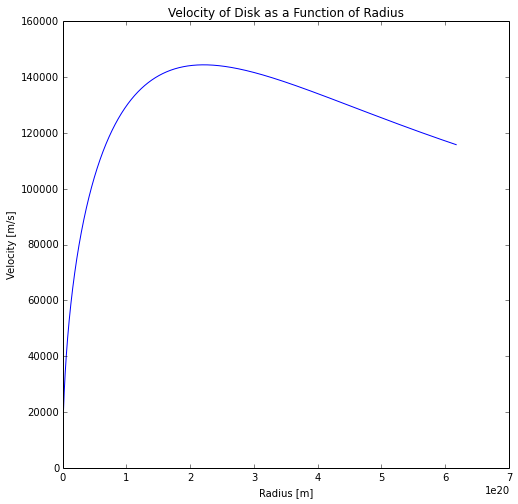

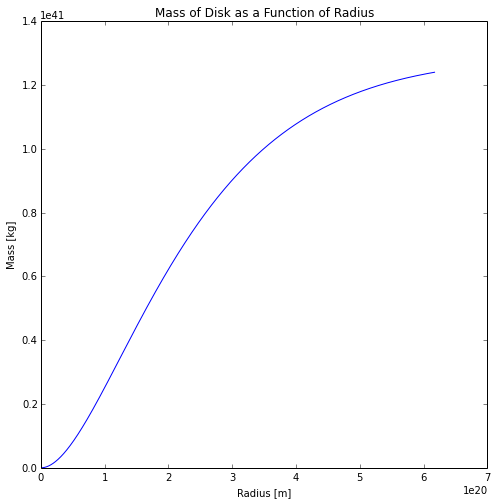

In [315]:
#for massDisk & velDisk
rMax = 20.0 *3.086E19
delR = rMax / 10000.0
r = np.linspace(0.0001, rMax, num = 10000)
massDisk = 0.0

def rhoDisk(r):
    rhoDisk0 = mD/(2*pi*aD**2) * exp(-r/aD)
    return rhoDisk0

def dmdrDisk(r):
    dmdrD = 2.0 * pi * r * rhoDisk(r)
    return dmdrD

#for mass
mDisk = list()
for i in r:
    massDisk = massDisk + dmdrDisk(i) * delR
    mDisk.append(massDisk)
    
#plot mass
fig = plt.figure(3, figsize=(8,8))
mDiskGraph = fig.add_subplot(111)
mDiskGraph.plot(r, mDisk)
mDiskGraph.set_xlabel('Radius [m]')
mDiskGraph.set_ylabel('Mass [kg]')
mDiskGraph.set_title('Mass of Disk as a Function of Radius')

#for velocity
velDisk = list()
for i, j in zip(mDisk, r):
    vDisk = (G * i / j)**(1.0 / 2.0)
    velDisk.append(vDisk)  
    
#plot velocity    
fig = plt.figure(2, figsize=(8,8))
vDiskGraph = plt.axes()
vDiskGraph.plot(r,velDisk)
vDiskGraph.set_title('Velocity of Disk as a Function of Radius')
vDiskGraph.set_xlabel('Radius [m]')
vDiskGraph.set_ylabel('Velocity [m/s]')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


[0.0, 3.5561730117121493e+34, 1.131530932367613e+35, 2.3923337914532318e+35, 4.2024847192623427e+35, 6.6262607177087214e+35, 9.7277093756050852e+35, 1.3570601565268982e+36, 1.8218384472377134e+36, 2.3734135020788287e+36, 3.0180513753187189e+36, 3.7619719227411886e+36, 4.6113442987216194e+36, 5.572282516499225e+36, 6.6508410772637795e+36, 7.8530106735303848e+36, 9.1847139721204577e+36, 1.0651801481901708e+37, 1.2260047511264935e+37, 1.4015146220131519e+37, 1.5922707771093081e+37, 1.7988254584084348e+37, 2.0217217698782617e+37, 2.2614933248712691e+37, 2.5186639050815587e+37, 2.793747131401304e+37, 3.0872461470069011e+37, 3.3996533129813722e+37, 3.73144991675572e+37, 4.0831058936276999e+37, 4.4550795615920784e+37, 4.847817369691829e+37, 5.2617536600750307e+37, 5.6973104439174719e+37, 6.1548971913462483e+37, 6.6349106354749877e+37, 7.137734590636841e+37, 7.6637397848770475e+37, 8.2132837067428603e+37, 8.7867104663848451e+37, 9.3843506709601968e+37, 1.000652131430579e+38, 1.0653525680826065

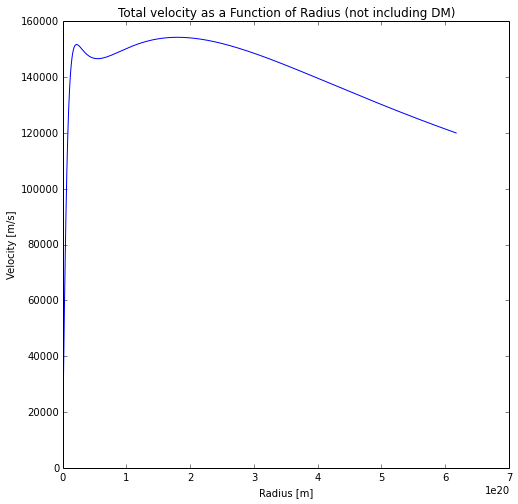

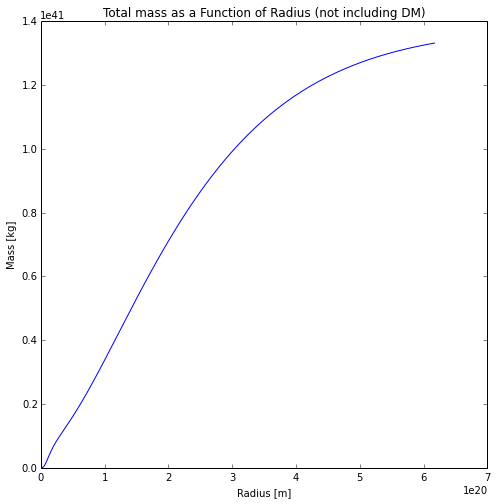

In [318]:
#For total mass & velocity w/out Dark Matter
r = np.linspace(0, rMax, num = 10000)
rMax = 20.0 *3.086E19
delR = rMax / 10000.0

massPlum = 0
massHalo = 0
massDisk = 0
#for mass
mTotal = list()
for i in r:
    massPlum = massPlum + dmdrPlum(i) * delR
    massHalo = massHalo + dmdrHalo(i) * delR
    massDisk = massDisk + dmdrDisk(i) * delR
    mT =  massPlum + massHalo + massDisk
    mTotal.append(mT)
    
#plot mass
fig = plt.figure(3, figsize=(8,8))
mTotalGraph = fig.add_subplot(111)
mTotalGraph.plot(r, mTotal)
mTotalGraph.set_xlabel('Radius [m]')
mTotalGraph.set_ylabel('Mass [kg]')
mTotalGraph.set_title('Total mass as a Function of Radius (not including DM)')

#for velocity
vTotal = list()
for i, j in zip(mTotal, r):
    vT = (G * i / j)**(1.0 / 2.0)
    vTotal.append(vT)

#plot velocity    
fig = plt.figure(2, figsize=(8,8))
vTotalGraph = plt.axes()
vTotalGraph.plot(r, vTotal)
vTotalGraph.set_title('Total velocity as a Function of Radius (not including DM)')
vTotalGraph.set_xlabel('Radius [m]')
vTotalGraph.set_ylabel('Velocity [m/s]')

#print vTotal
print mTotal
